In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import torch
import sys
sys.path.append('/Users/mehdi/github/sysnetdev')
from sysnet.sources.models import DNN
from sysnet.sources.io import load_checkpoint

In [9]:
def load_l0weights(pid):
    """ load model """ 
    model = DNN(*(5, 20, 18, 1))
    
    path = '../output/mock001_cp2p_adamw/model/'
    load_checkpoint(f'{path}model_{pid}_2664485226/best.pth.tar', model)
    
    fc0_weight = model.fc[0].weight.data.numpy()
    return fc0_weight

In [3]:
def imshow(f0w):
    fig, ax = plt.subplots()
    
    ylabels = ['EBV', 'lnHI', 'nstar']\
            + ['-'.join([s, b]) for s in ['depth', 'seeing', 'skymag', 'exptime', 'mjd'] \
               for b in 'rgz']    
    
    map1 = ax.imshow(f0w.T, origin='lower', cmap=plt.cm.bwr, vmin=-.5, vmax=.5)#, vmin=-0.3, vmax=0.3)
    fig.colorbar(map1)
    ax.set_yticks(np.arange(18))
    ax.set_yticklabels(ylabels)
    
    return ax

In [10]:
f0w = []
for pid in range(5):
    f0w.append(load_l0weights(pid))

In [5]:
%matplotlib inline

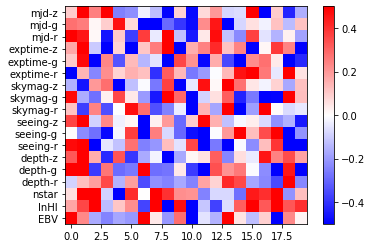

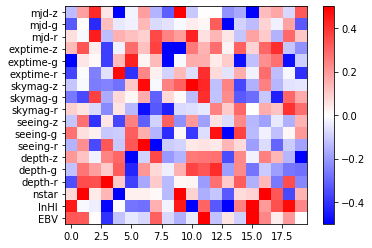

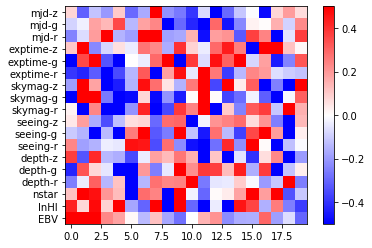

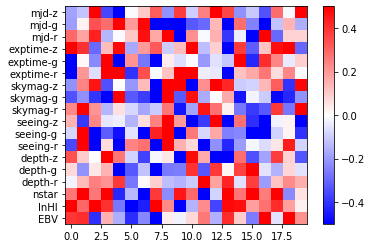

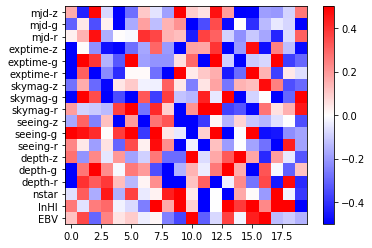

In [6]:
for f0wi in f0w:
    imshow(f0wi)

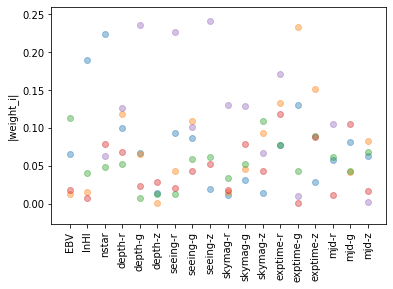

In [12]:
xlabels = ['EBV', 'lnHI', 'nstar']\
        + ['-'.join([s, b]) for s in ['depth', 'seeing', 'skymag', 'exptime', 'mjd'] \
           for b in 'rgz']    

for f0wi in f0w:    
    plt.scatter(np.arange(18), abs(f0wi.mean(axis=0)), alpha=0.4)
    
plt.ylabel('|weight_i|')
plt.ylim(ymax=0.26)
_=plt.xticks(np.arange(18), labels=xlabels, rotation=90)

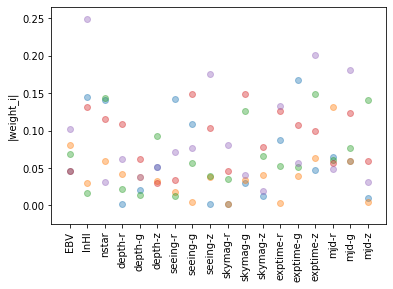

In [7]:
xlabels = ['EBV', 'lnHI', 'nstar']\
        + ['-'.join([s, b]) for s in ['depth', 'seeing', 'skymag', 'exptime', 'mjd'] \
           for b in 'rgz']    

for f0wi in f0w:    
    plt.scatter(np.arange(18), abs(f0wi.mean(axis=0)), alpha=0.4)
    
plt.ylabel('|weight_i|')
_=plt.xticks(np.arange(18), labels=xlabels, rotation=90)

In [8]:
def imshow2(fc0w):
    ylabels = ['EBV', 'lnHI', 'nstar']\
            + ['-'.join([s, b]) for s in ['depth', 'seeing', 'skymag', 'exptime', 'mjd'] \
               for b in 'rgz']        
    
    plt.figure(figsize=(6, 10))
    
    plt.imshow(abs(fc0w.mean(axis=0)[:, np.newaxis]), 
               cmap=plt.cm.Blues, extent=(0, 5, -0.5, 17.5), 
               origin='lower')
    
    plt.yticks(np.arange(18), labels=ylabels)
    
    plt.xticks([])
    plt.colorbar()    

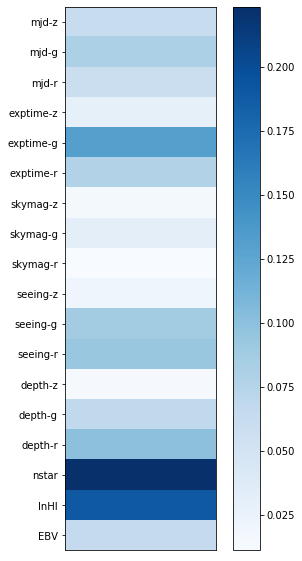

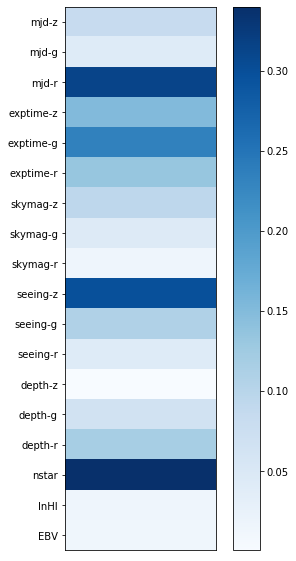

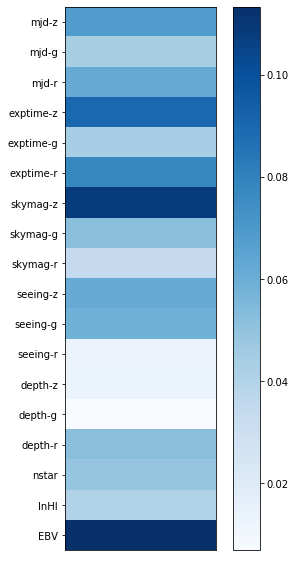

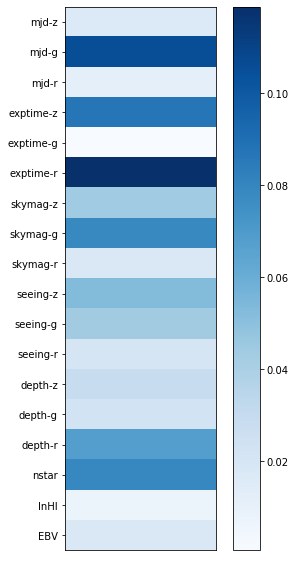

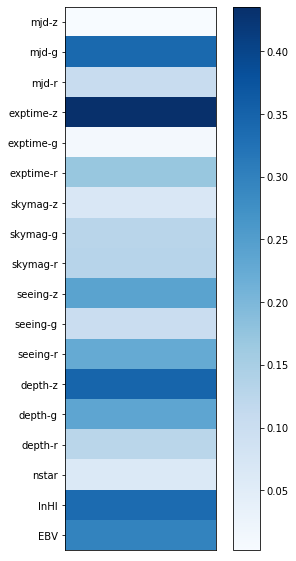

In [14]:
for f0wi in f0w:
    imshow2(f0wi)

## correlation 

In [20]:
df = np.load('../input/001/cp2p/cp2p_001.hp.256.5.r.npy', allow_pickle=True).item()

In [21]:
df.keys()

dict_keys(['test', 'train', 'validation'])

In [22]:
dt = np.concatenate([df['test']['fold%d'%i] for i in range(5)])

In [23]:
dt

array([(0.53752334, 164046, [1.81269739e-02, 4.64452051e+01, 9.53182495e+02, 2.32829876e+01, 2.36321564e+01, 2.22366638e+01, 1.65602851e+00, 2.06096888e+00, 1.46481442e+00, 2.38607674e+01, 2.52443409e+01, 2.16411324e+01, 1.47692307e+02, 2.07923080e+02, 1.81384613e+02, 5.71093711e+04, 5.71093711e+04, 5.71093672e+04], 1.05231352),
       (0.11811819, 164974, [1.06161097e-02, 4.60299349e+01, 4.19400299e+02, 2.32656784e+01, 2.35504894e+01, 2.24146347e+01, 1.58421600e+00, 1.98907864e+00, 1.51539063e+00, 2.33363934e+01, 2.46431160e+01, 2.17498646e+01, 1.51166672e+02, 2.11833328e+02, 2.13333328e+02, 5.71292461e+04, 5.71292461e+04, 5.71292422e+04], 1.19719727),
       (0.90147143, 165070, [1.79187600e-02, 4.64456763e+01, 1.12475537e+03, 2.34990387e+01, 2.38696079e+01, 2.24596119e+01, 1.57656622e+00, 1.91230607e+00, 1.40638876e+00, 2.38358555e+01, 2.52123795e+01, 2.11286602e+01, 2.08000000e+02, 2.93799988e+02, 2.61533325e+02, 5.71093711e+04, 5.71093711e+04, 5.71093672e+04], 1.09806628),
       

In [24]:
from scipy.stats import pearsonr

In [ ]:
fig, ax = plt.sub
